In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
df = pd.read_csv('perf.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
print('number of rows',df.shape[0],'and',df.shape[1], 'columns')

number of rows 1000 and 8 columns


In [6]:
df=df.rename(columns={'race/ethnicity':'race_ethnicity','parental level of education':'education_level','test preparation course':'test_preparation'})

In [7]:
df.tail()

,gender,race_ethnicity,education_level,lunch,test_preparation,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
df.describe(include='all')

,gender,race_ethnicity,education_level,lunch,test_preparation,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [9]:
df.isna().sum()

gender              0
race_ethnicity      0
education_level     0
lunch               0
test_preparation    0
math score          0
reading score       0
writing score       0
dtype: int64

In [10]:
df.isnull().values.any()

False

### Function corr() is used to find the pairwise correlation of all columns in the dataframe.



In [11]:
correlation = df.corr()
correlation 

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

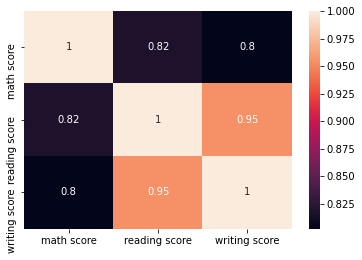

In [12]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [13]:
mf = df['gender'].value_counts()
mf

female    518
male      482
Name: gender, dtype: int64

In [14]:
df.nunique()

gender               2
race_ethnicity       5
education_level      6
lunch                2
test_preparation     2
math score          81
reading score       72
writing score       77
dtype: int64

<AxesSubplot:ylabel='Frequency'>

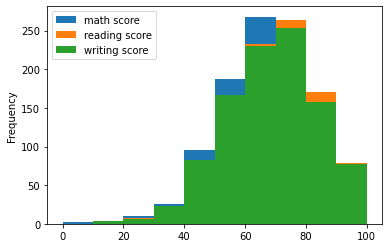

In [15]:
df.plot(kind='hist')

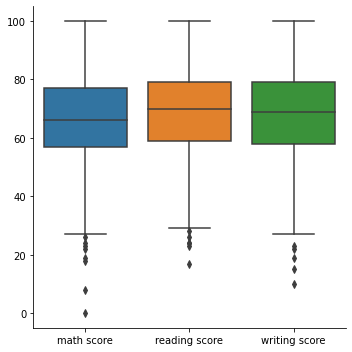

In [16]:
sns.catplot(data=df, kind='box')

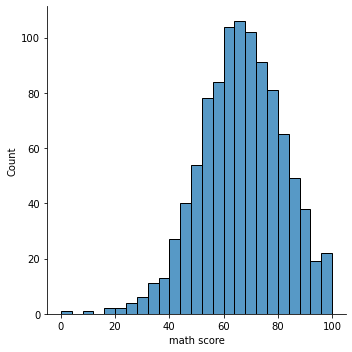

In [17]:
sns.displot(df['math score'])

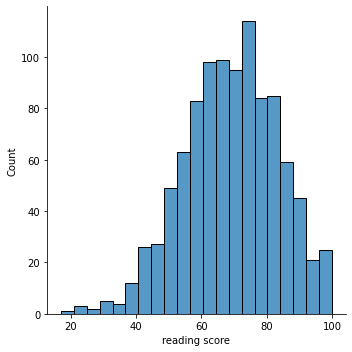

In [18]:
sns.displot(df['reading score'])

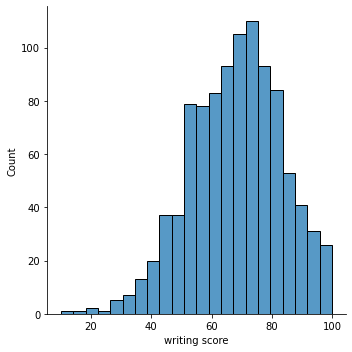

In [19]:
sns.displot(df['writing score'])

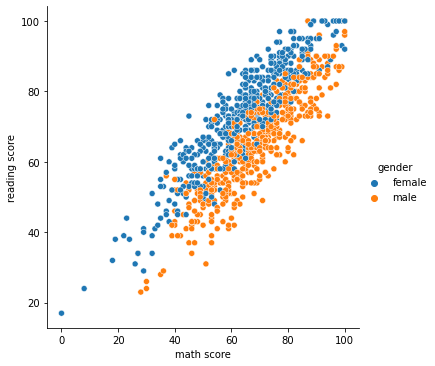

In [23]:
sns.relplot(x='math score',y='reading score',hue='gender', data=df)

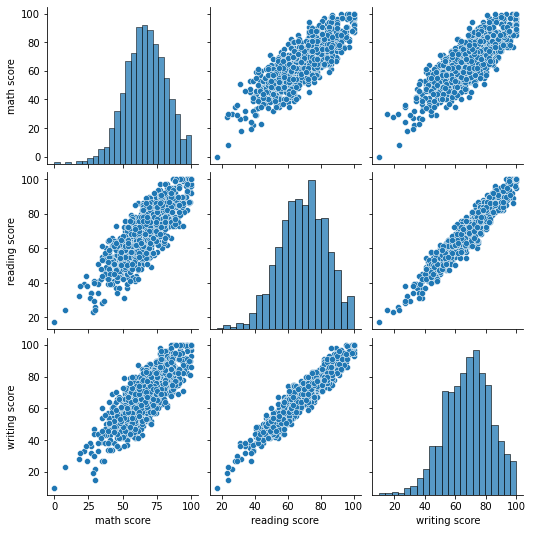

In [25]:
sns.pairplot(df)

<AxesSubplot:xlabel='gender', ylabel='count'>

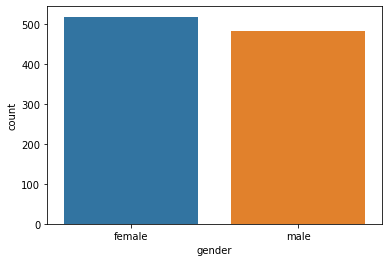

In [27]:
sns.countplot(data =  df, x='gender')

<AxesSubplot:xlabel='race_ethnicity', ylabel='count'>

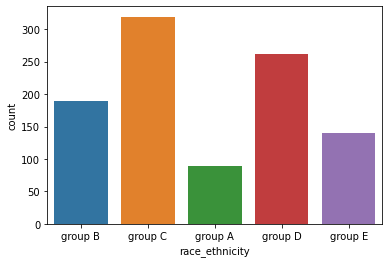

In [29]:
sns.countplot(data=df, x=df['race_ethnicity'])